# Lepton Jet Resolution

This notebook is intended for good quality summary plots related to lepton jet resolution studies 

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../')) # This is definitely a bit hacky, but I don't mind
from sidm.tools import ffschema, sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
#plotting
import numpy as np
import matplotlib.pyplot as plt
utilities.set_plot_style()
import hist
from sidm.tools import histogram as h
importlib.reload(h)

<module 'sidm.tools.histogram' from '/home/cms-jovyan/SiDM/SIDM_broken/sidm/studies/../../sidm/tools/histogram.py'>

In [2]:
samples = [
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_150GeV_1p2GeV_6p4mm",
    "2Mu2E_200GeV_1p2GeV_4p8mm",
    "2Mu2E_500GeV_1p2GeV_1p9mm",
    "2Mu2E_800GeV_1p2GeV_1p2mm",
    "2Mu2E_1000GeV_1p2GeV_0p96mm",
]
masses = [s.split("_")[1] for s in samples]
channels = ["2mu2e_matchedLj"]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    channels,
    ["base_plus_gen_resolution"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

## Overarching Plots

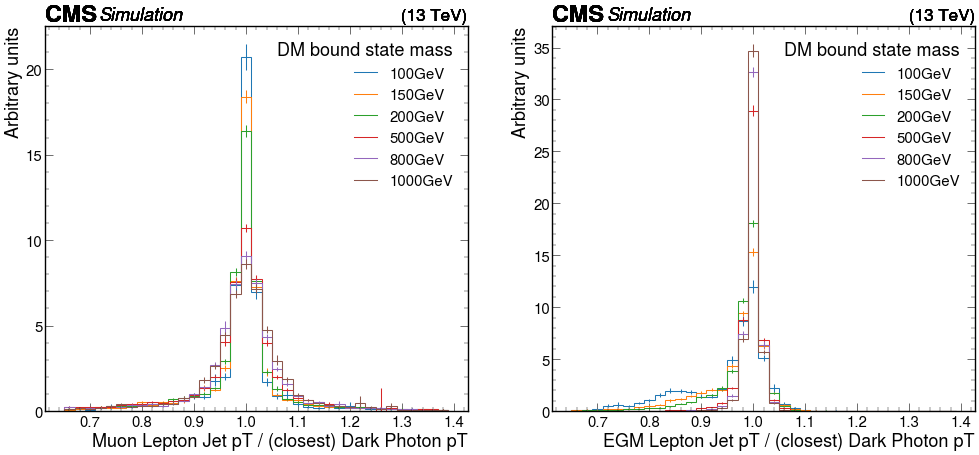

In [3]:
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10), dpi=50)
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_muLj_ptRatio"][channels[0], 0.65j:1.4j:2j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")
    plt.ylim(bottom=0)
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[0], 0.65j:1.4j:2j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")

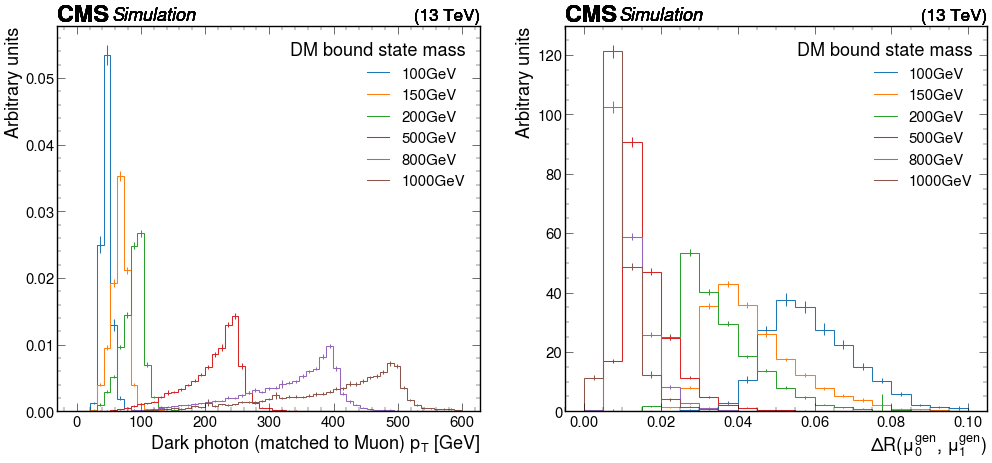

In [4]:
# Note the following plots look the same for EGM or Muons
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10), dpi=50)
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genAs_toMu_pt"][channels[0], :600j:3j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu_genMu_dR_lowRange"][channels[0], :.1j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")

Points to note here, bearing in mind the Lxy for these cases are all the same:
1. Greater boost results in worse Muon LJ resolution.
2. Greater boost results in better EGM LJ resolution; Poor boost / collimation results in lost particles in the EGM LJs, which results in a double peak / large shoulder structure in the LJ resolution

## Muon Type LJ

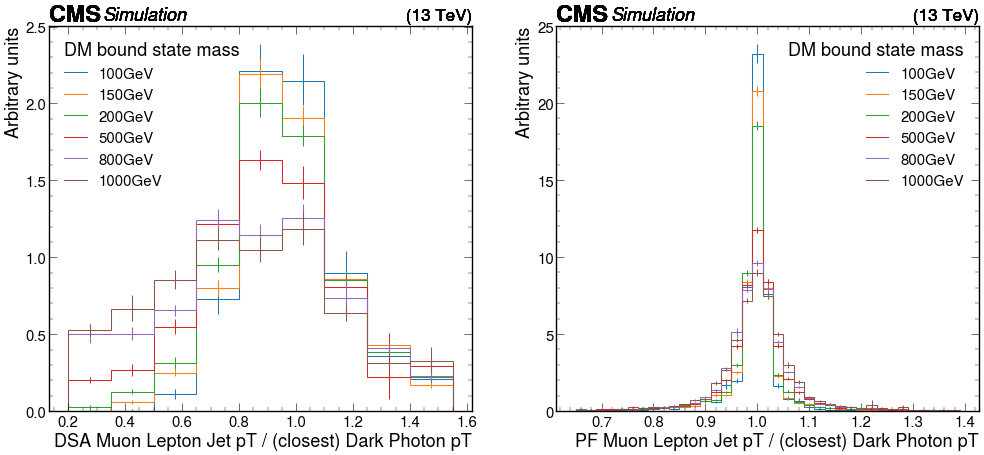

In [5]:
nplots = 2
plt.subplots(1, nplots, figsize=(nplots*12, 10), dpi=50)
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_dsaMuonLj_ptRatio"][channels[0], 0.2j:1.6j:15j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="left")
    plt.ylabel("Arbitrary units")
    plt.ylim(bottom=0)
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_pfMuonLj_ptRatio"][channels[0], 0.65j:1.4j:2j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")

Notes from above, DSA LJ resolution is a lot wider than PF Muon LJ. Worsening resolution with increasing boost is observed across both types of Muon LJs

## EGM Type LJ

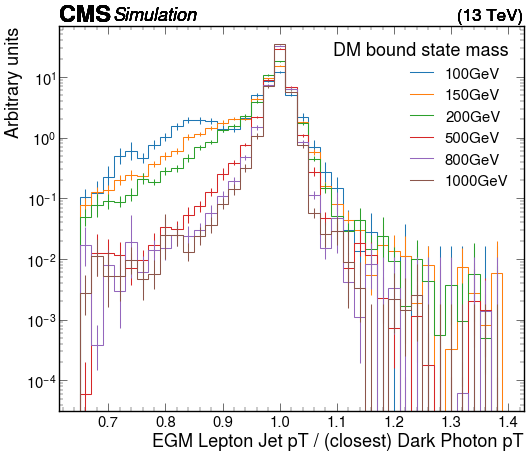

In [6]:
nplots = 1
plt.subplots(1, nplots, figsize=(nplots*12, 10), dpi=50)
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[0], 0.65j:1.4j:2j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")
    plt.yscale("log")

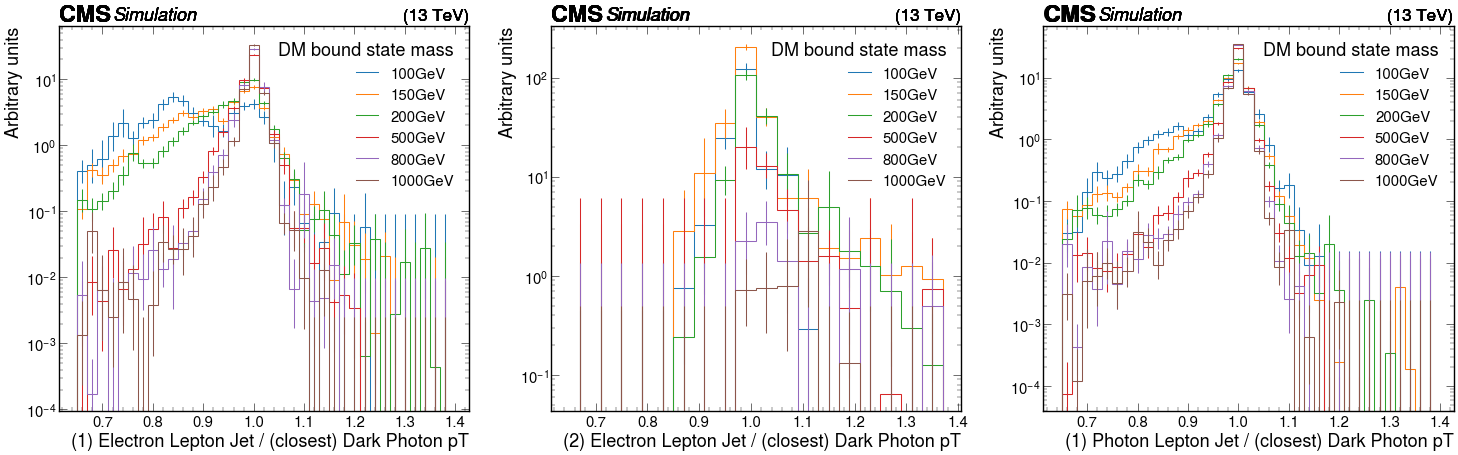

In [7]:
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 10), dpi=50)
plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_oneElectronLj_ptRatio"][channels[0], 0.65j:1.4j:2j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")
    plt.yscale("log")
plt.subplot(1, nplots, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_twoElectronLj_ptRatio"][channels[0], 0.65j:1.4j:4j], density=False)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")
    plt.yscale("log")
plt.subplot(1, nplots, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genA_onePhotonLj_ptRatio"][channels[0], 0.65j:1.4j:2j], density=True)
    plt.legend(masses, title="DM bound state mass", alignment="right")
    plt.ylabel("Arbitrary units")
    plt.yscale("log")

This rather nicely shows that the effect of worsening resolution for EGM LJ as boost decreases is due to the presence of mainly one electron LJs (LJ that have only one electron and no photons in R=0.4 cone) and one photon lepton jets (LJ that have only one photon and no electrons in R=0.4 cone) - bolstering the lost particles hypothesis